# SIT744 Assignment 3 (T2 2025)

Due: Week 9 Monday 8:00 pm (AEST)

This is an individual assignment. It contributes 30% to your final mark. Read the assignment instructions carefully.

## What to submit
By the due date, you are required to submit the following files to the corresponding Assignment (Dropbox) in CloudDeakin:

- **[YourID]_[UnitCode]_assignment3_solution.ipynb**: This is your Python notebook solution source file.
- **[YourID]_[UnitCode]_assignment3_output.pdf**: This is the output of your Python notebook solution exported in PDF format. (You may use [nbconvert](https://github.com/jupyter/nbconvert).)
- (HD Task only) A short (less than 5 minutes) screencast explaining your work (including study design, implementation, and main conclusions).
- Extra files required to complete your assignment, if any (e.g., images used in your answers).

For example, if your student ID is: 123456, and you are a SIT744 student, you will then need to submit the following files:

- 123456_SIT744_assignment3_solution.ipynb
- 123456_SIT744_assignment3_output.pdf

Please keep your answers short and to the point. Clean up your code outputs to reduce unnecessary information (e.g., excessively long training logs).

## Warning
Some components of this assignment may involve heavy computation that runs for a long duration. Please start early to avoid missing the assignment due date.

## Assignment objective

This assignment is to provide feedback on your learning in deep learning theory and its application to  data analytics or artificial intelligence problems.  

It builds on Assignment 1 and 2 but requires a higher level of mastery of deep learning theory and programming/engineering skills. In particular, you will practice making design decisions yourself. You are also likely to encounter practical issues that will help you consolidate textbook learning.

## **Task 1 (P Task) Deep Learning for Sentiment Image Classification**

Every day, people express their emotions in subtle and visible ways—through facial expressions, gestures, or images. Understanding these emotions is crucial for applications ranging from mental health support to human-computer interaction. Deep learning offers powerful techniques to automatically detect and classify such sentiments from images, enabling more empathetic technologies.

In this assignment, you will develop a Convolutional Neural Network (CNN) based solution to classify images into six emotion categories: Happy, Sad, Fear, Pain, Anger, and Disgust. The dataset used in this project is collected from multiple online sources and is available at https://www.kaggle.com/datasets/yousefmohamed20/sentiment-images-classifier/data. 

### Task 1.1 Define the problem

Define the image classification problem:

What exactly are we trying to solve with sentiment recognition?

- we are trying to teach a computer to understand human emotions by looking at a picture.

What are the desired inputs and outputs of the system?

- We input a single image which contain a person's face or body language that shows one of the six emotions: Happy, Sad, Fear, Pain, Anger, Disgust. Our system will return a label that says which emotion the computer thinks is in the image. 

Clearly describe the target classes (Happy, Sad, Fear, Pain, Anger, Disgust).

  * **Happy:** This is a positive emotion. In pictures, it often looks like a person smiling, with raised cheeks and wrinkles around the eyes. It shows joy and pleasure.
  * **Sad:** This is a negative emotion. It can look like a person frowning, with the corners of the mouth turned down. Sometimes there are tears or a look of disappointment.
  * **Fear:** This is a reaction to danger. In pictures, people often have wide-open eyes, raised eyebrows, and sometimes an open mouth as if they are gasping.
  * **Pain:** This is a reaction to being hurt, either physically or emotionally. It can look like a person wincing, with their eyes shut tight, a wrinkled nose.
  * **Anger:** This is a strong negative emotion. It often looks like a person with narrowed eyes, a strong frown, a tight jaw, and sometimes they might be showing their teeth.
  * **Disgust:** This is a reaction to something unpleasant, like a bad smell or a horrible sight. The most common sign is a wrinkled nose and a raised upper lip.

Why might misclassification be problematic (e.g., confusing Fear with Pain)?

- If the healthcare system in a hospital or a home sees a person is in pain, it should immediately alert a doctor or a nurse for help. While if the system incorrectly thinks the person is just feeling fear, it might not send an alert. In this situation, a person who needs urgent medical help might not get it because of the computer's mistake. This could be very dangerous.


### Task 1.2 Make a plan

Load the dataset and answer the following questions: 
  - Given the total number of images in the dataset, how would you determine an appropriate train/validation/test split ratio? Justify your choice.



  For this dataset, there are a total of 1200 images, I plan to use an 80% train (960 images), this is the biggest part of the data. We need many examples for the CNN to learn the features of each emotion. For a small dataset like this, using a large portion for training is very important. Then I plan to use 10% validation (120 images), We use this set to check the model's performance during training. It helps us tune hyperparameters (like learning rate) and know when to stop training to avoid overfitting. I use the rest of 10% test (120 images) split. This set is kept separate and is used only one time at the end. It gives us an honest, final score of how well our model can perform on new, unseen data.

  - Using quantitative analysis (e.g., histograms, percentages), evaluate whether the dataset is balanced across the six emotion classes. What evidence indicates    underrepresentation, and how might this influence learning dynamics?

  The analysis from the provided file shows the percentage of images for each class:

  * **Happy:** 19.17% (approx. 230 images)
  * **Sad:** 18.67% (approx. 224 images)
  * **Anger:** 17.83% (approx. 214 images)
  * **Disgust:** 16.75% (approx. 201 images)
  * **Pain:** 14.00% (approx. 168 images)
  * **Fear:** 13.58% (approx. 163 images)

The classes are not perfectly balanced. The 'happy' class has the most images (230), while the 'fear' class has the fewest (163). The number of images for 'fear' and 'pain' are noticeably lower than for 'happy' and 'sad'. This is evidence of a mild class imbalance. The largest class ('happy') is about 1.4 times larger than the smallest class ('fear'). This imbalance can be a problem. The model will see more examples of 'happy' and 'sad' images during training. Because of this, it might become biased and learn to predict these majority classes better. It may struggle to correctly identify the minority classes like 'fear' and 'pain' because it has not seen enough examples to learn their features well.

  - From a theoretical standpoint, explain how class imbalance can bias gradient updates during training. Which corrective techniques (e.g., reweighting loss functions, oversampling, data augmentation) could be applied, and why?



During training, the model learns by calculating an error (loss) and updating its weights using gradients. When we use a mini-batch of data, if that batch has more images from the 'happy' class, the total loss will be dominated by the errors from the 'happy' images. As a result, the gradient update will mostly adjust the model's weights to be better at predicting 'happy'. The model pays less attention to the errors from minority classes like 'fear', so it learns slowly for those classes.

We can use the following techniques to fix this problem:

  **Reweighting Loss Functions:** We can change the loss function (like Cross-Entropy) to give a higher penalty for mistakes on the minority classes. This forces the model to pay more attention to getting the minority classes correct.

  **Oversampling:** This means we add more copies of the images from the minority classes ('fear', 'pain') to the training set. A simple way is to just duplicate the images. A better way is to use techniques like SMOTE (Synthetic Minority Over-sampling Technique), which creates new, artificial images that are similar to the existing ones. This helps to balance the class distribution.

  **Data Augmentation:** We can apply more data augmentation (like rotations, flips, brightness changes) to the images in the minority classes. This creates more variety for these classes, effectively increasing their sample size and helping the model learn their features better without just seeing the same images again.



  - Design a preprocessing workflow for the images, covering resizing, normalization, augmentation, and feature scaling. For each stage, explain its mathematical or computational effect on the data and on the convergence of the deep learning model.



The plan for preprocessing the images before feeding them to the CNN:

The first step is to load each image and convert it from a 3-channel RGB image into a 1-channel grayscale image. This simplifies the input data, reducing the number of parameters in the first layer of the CNN. It forces the model to focus on structural features like shapes and textures (e.g., a smile or frown) rather than color, which may not be as important for identifying the six emotions in this dataset. 

Our dataset contains images with many different dimensions, such as (612, 408), (640, 360), and (1500, 1101). All images must be resized to a fixed size, for example, 224 x 224 pixels. CNNs require that all inputs in a batch have the same dimensions.This is computationally necessary for batch processing on a GPU.

On data augmentation, we can apply simple, random horizontal flip transformations to the training images. These transformations create new training examples from existing ones. This makes the training set larger and more diverse. It helps the model to generalize better, meaning it becomes less sensitive to the orientation or position of objects in the image. 

The pixel values of an image are usually from 0 to 255. We need to changes the range to [0.0, 1.0] and convert the image to a tensor. We normalize the tensor using the mean and standard deviation. Normalization makes the pixel values centered around 0. This helps the model's optimization algorithm (like gradient descent) to converge faster and more stably. It prevents the gradients from becoming too large, which can make training unstable.

  - Analyze how the number of training samples (small vs. large) influences a deep learning model’s performance in terms of underfitting, overfitting, and generalization capacity. Discuss how this interacts with model complexity.
  
  

The number of training samples has a very big impact on a deep learning model. For small number of samples (like this dataset)using complex model with many parameters (a "deep" CNN) can easily memorize the 960 training images, including their noise and random details. When it does this, it will have very high accuracy on the training data but will fail to predict correctly on the validation or test data. Its generalization capacity is low. While if we use a very simple model to avoid overfitting, it might not be powerful enough to learn the complex patterns in the images causing underfitting. The model performs poorly on both training and test data. With a large dataset (e.g., millions of images), a complex model is forced to learn the real, underlying features that define each class. It cannot simply memorize the data because there is too much of it. This leads to good performance on new, unseen data, which is high generalization capacity. The risk of overfitting is much lower.




### Task 1.3 Implement a solution

- Load the dataset and perform the  preprocessing steps.
- Build a deep learning model for this classification task. For each layer in your model (e.g., convolution, pooling/strided convolution, normalization, activation, dropout, linear/classifier)(Your answer should include a short 1–2 sentence explanation for each layer you use.):

   - State its purpose (what the layer does).
   - Explain its effect on training or efficiency (e.g., number of parameters, computational cost, convergence, regularisation, risk of overfitting).
   - Justify why it is suitable for this dataset (why this layer helps with image-based emotion recognition).

- How can you tell if your model is overfitting? Apply at least three independent checks, report the evidence, and discuss mitigations. 
- Which metrics are appropriate for this multi-class task, and why is accuracy alone insufficient? Choose a primary and two secondary metrics and justify each in 3–5 lines.
- Report and discuss the model performance. Beyond accuracy, critically evaluate which metrics (precision, recall, F1, confusion matrix, ROC–AUC) best capture model robustness in this multi-class setting. Provide reasoning for why each is (or isn’t) appropriate when dealing with class imbalance.











In [1]:
#...
#...
#...
#...
#...
#...
#...
#...
#...
#...
#...
#...
#...
#...
#...
#...
#...
#...
#...
#...
#...
#...
#...
#...
#...
#...
#...
#...

In [5]:
!pip -q install kaggle
!pip -q install datasets
!pip -q install torch torchvision --upgrade



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [6]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms.v2 as T
from torch.utils.data import DataLoader, Subset
from torchvision.datasets import ImageFolder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datasets import load_dataset
from PIL import Image, ImageOps  # For converting array-based images to PIL before transforms

import warnings
warnings.filterwarnings ('ignore')

In [9]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
# !cp "/content/drive/MyDrive/kaggle.json" ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d yousefmohamed20/sentiment-images-classifier
!unzip -q sentiment-images-classifier.zip -d ./

# path = kagglehub.dataset_download("yousefmohamed20/sentiment-images-classifier")
# print("Path to dataset files:", path)


mkdir: cannot create directory ‘/home/user/.kaggle’: File exists
Dataset URL: https://www.kaggle.com/datasets/yousefmohamed20/sentiment-images-classifier
License(s): apache-2.0
 86%|█████████████████████████████████▌     | 98.0M/114M [00:00<00:00, 1.03GB/s]
100%|████████████████████████████████████████| 114M/114M [00:00<00:00, 1.04GB/s]


In [10]:
image_path = "./6 Emotions for image classification"
classes = sorted([d for d in os.listdir(image_path) if os.path.isdir(os.path.join(image_path, d))])
print(classes)

['anger', 'disgust', 'fear', 'happy', 'pain', 'sad']


In [11]:
import os
from collections import Counter

# Loop through each subdirectory inside image_path
for subdir in [d for d in os.listdir(image_path) if os.path.isdir(os.path.join(image_path, d))]:
    full_path = os.path.join(image_path, subdir)
    print(f"Directory: {subdir}")
    extensions = []

    # Walk through files in the subdirectory
    for root, _, files in os.walk(full_path):
        for file in files:
            ext = os.path.splitext(file)[1].lower().strip('.')
            if ext:
                extensions.append(ext)

    # Count and display
    counts = Counter(extensions)
    for ext, count in counts.most_common():
        print(f"  {count:3} {ext}")
    print(f"-----------------------------")


Directory: pain
  132 jpg
   30 jpeg
    6 webp
-----------------------------
Directory: happy
  229 jpg
    1 png
-----------------------------
Directory: disgust
  159 jpg
   40 webp
    2 jfif
-----------------------------
Directory: fear
  154 jpg
    4 webp
    4 jpeg
    1 png
-----------------------------
Directory: sad
  223 jpg
    1 jpeg
-----------------------------
Directory: anger
  212 jpg
    1 jpeg
    1 png
-----------------------------


In [12]:
import os
from PIL import Image
from collections import Counter

def count_image_sizes(root_dir):
    size_counter = Counter()

    for subdir, _, files in os.walk(root_dir):
        for file in files:
            if file.lower().endswith(('.jpg', '.jpeg', '.png', '.webp', '.jfif')):
                path = os.path.join(subdir, file)
                try:
                    with Image.open(path) as img:
                        size = img.size  # (width, height)
                        size_counter[size] += 1
                except Exception as e:
                    print(f"Error reading {path}: {e}")

    return size_counter
size_counts = count_image_sizes(image_path)

# Print the top 10 most common sizes
for size, count in size_counts.most_common(10):
    print(f"Size {size}: {count} images")


Size (612, 408): 252 images
Size (640, 360): 43 images
Size (626, 417): 38 images
Size (1500, 1101): 28 images
Size (600, 400): 14 images
Size (459, 612): 13 images
Size (612, 407): 12 images
Size (540, 360): 12 images
Size (612, 612): 11 images
Size (390, 280): 11 images


In [13]:
import os

folder = "./6 Emotions for image classification/disgust"
for filename in os.listdir(folder):
    if filename.endswith(".jfif"):
        base = os.path.splitext(filename)[0]
        new_name = base + ".jpg"
        os.rename(os.path.join(folder, filename), os.path.join(folder, new_name))


In [14]:
# Training configuration 
IMG_SIZE = 224  # Using 128x128 for faster training, change to 224 for better performance
BATCH_SIZE = 8
LEARNING_RATE = 0.001
NUM_EPOCHS = 50 # Train for more epochs for better results

# Set device (use GPU if available, otherwise CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cpu


In [15]:
# --- Transform ---
class ForceRGB:
    def __call__(self, img):
        return img.convert('RGB')

transform = T.Compose([
    T.Grayscale(num_output_channels=1),
    T.Resize((IMG_SIZE, IMG_SIZE)),
    T.RandomHorizontalFlip(p=0.5),
    T.ToImage(), # converts input image (PIL) to a tv_tensors.Image
    T.ToDtype(torch.float32, scale=True), # Converts from uint8 [0, 255] to float [0, 1]
    T.Normalize(mean=[0.5], std=[0.5])
])



--- Class Distribution (Total images: 1200) ---
anger: 17.8333%
disgust: 16.75%
fear: 13.5833%
happy: 19.1667%
pain: 14.0%
sad: 18.6667%


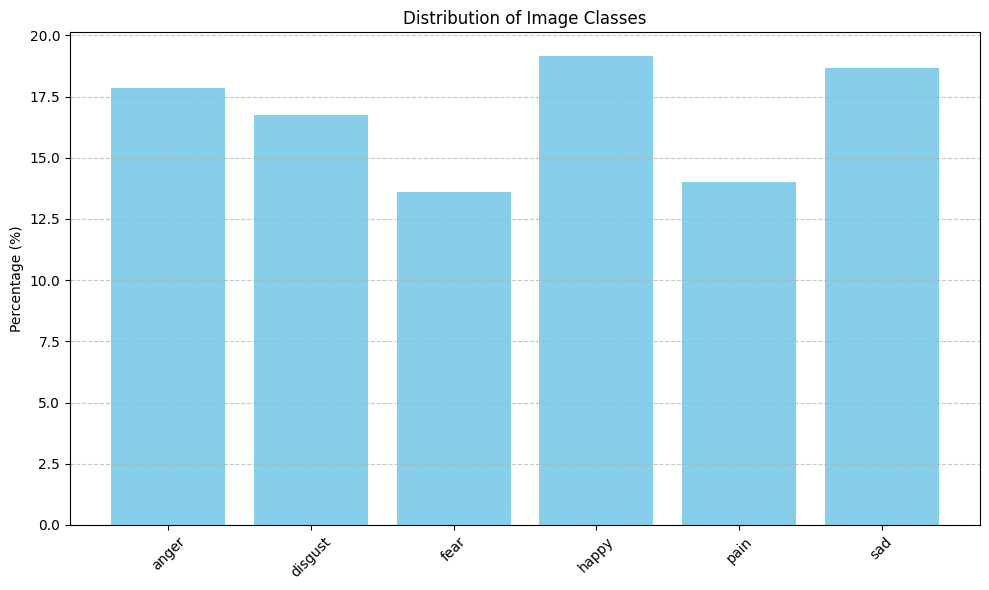

In [17]:
# setup class dict
image_path = "./6 Emotions for image classification"
dataset = ImageFolder(root=image_path, transform=transform)

# --- Calculate images ---
class_names = dataset.classes
num_classes = len(class_names)
total_samples = len(dataset)

# Count images per class
class_counts = [0] * num_classes
for _, class_idx in dataset.samples:
    class_counts[class_idx] += 1

# Calculate percentages
class_percentages = [(count / total_samples) * 100 for count in class_counts]

# Calculate weights
class_weights = [total_samples / (num_classes * count) for count in class_counts]

# Construct the dictionary
class_stats = {}
for i, class_name in enumerate(class_names):
    class_stats[class_name] = {
        "class_count": class_counts[i],
        "class_percentage": round(class_percentages[i], 4),
        "class_weight": round(class_weights[i], 4)
    }

#  Convert weights to tensor for PyTorch loss function 
class_weights_tensor = torch.tensor(class_weights, dtype=torch.float32)

print(f"\n--- Class Distribution (Total images: {total_samples}) ---")
for cls, stats in class_stats.items():
    print(f"{cls}: {stats['class_percentage']}%")


# Plot
plt.figure(figsize=(10, 6))
plt.bar(class_names, class_percentages, color='skyblue')
plt.ylabel("Percentage (%)")
plt.title("Distribution of Image Classes")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [18]:
# --- Dataset + Split ---
torch.manual_seed(42)
np.random.seed(42)

# Get all indices
all_indices = list(range(len(dataset)))

# 1st split: train (80%) vs temp (20%)
train_idx, temp_idx = train_test_split(
    all_indices, test_size=0.2, random_state=42, shuffle=True
)

# 2nd split: temp (20%) -> val (10%) + test (10%)
val_idx, test_idx = train_test_split(
    temp_idx, test_size=0.5, random_state=42, shuffle=True
)

# Create subsets
train_ds = Subset(dataset, train_idx)
val_ds = Subset(dataset, val_idx)
test_ds = Subset(dataset, test_idx)

# Dataloaders
train_loader = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_ds, batch_size=BATCH_SIZE, shuffle=False)
test_loader = DataLoader(test_ds, batch_size=BATCH_SIZE, shuffle=False)

In [19]:
# --- CNN Model ---
class SimpleCNN(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        self.features = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),  # 112x112
            nn.Dropout(0.25),
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2)   # 56x56
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(64 * 56 * 56, 224), 
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(224, num_classes)
        )


    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x



In [20]:
# --- Training ---
def train_one_epoch(model, criterion, optimizer, data_loader, device):
    """ Function to train the model for one epoch. """
    model.train()
    running_loss = 0.0
    correct_predictions = 0
    total_samples = 0
    
    for images, labels in data_loader:
        images, labels = images.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item() * images.size(0)
        _, predicted = torch.max(outputs.data, 1)
        total_samples += labels.size(0)
        correct_predictions += (predicted == labels).sum().item()
        
    epoch_loss = running_loss / total_samples
    epoch_acc = 100 * correct_predictions / total_samples
    return epoch_loss, epoch_acc

def evaluate(model, criterion, data_loader, device):
    """ Function to evaluate the model on a dataset. """
    model.eval()
    running_loss = 0.0
    correct_predictions = 0
    total_samples = 0
    
    with torch.no_grad():
        for images, labels in data_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            
            running_loss += loss.item() * images.size(0)
            _, predicted = torch.max(outputs.data, 1)
            total_samples += labels.size(0)
            correct_predictions += (predicted == labels).sum().item()
            
    epoch_loss = running_loss / total_samples
    epoch_acc = 100 * correct_predictions / total_samples
    return epoch_loss, epoch_acc

def plot_curves(history):
    """ Function to plot training and validation curves. """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # Plotting loss
    ax1.plot(history['train_loss'], label='Train Loss')
    ax1.plot(history['val_loss'], label='Validation Loss')
    ax1.set_title('Loss vs. Epochs')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.legend()
    
    # Plotting accuracy
    ax2.plot(history['train_acc'], label='Train Accuracy')
    ax2.plot(history['val_acc'], label='Validation Accuracy')
    ax2.set_title('Accuracy vs. Epochs')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy (%)')
    ax2.legend()
    
    plt.show()

def generate_confusion_matrix(model, data_loader, device, class_names):
    """ Function to generate and plot the confusion matrix. """
    print("\n--- Generating Confusion Matrix on Test Set ---")
    model.eval()
    y_true = []
    y_pred = []
    
    with torch.no_grad():
        for images, labels in data_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            y_true.extend(labels.cpu().numpy())
            y_pred.extend(predicted.cpu().numpy())
    
    print("Classification Report:")
    print(classification_report(y_true, y_pred, target_names=class_names, zero_division=0))
    
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()



Epoch 1/50 | Train Loss: 2.5172, Train Acc: 16.88% | Val Loss: 1.7908, Val Acc: 18.33%
Epoch 2/50 | Train Loss: 1.7920, Train Acc: 17.71% | Val Loss: 1.7910, Val Acc: 18.33%
Epoch 3/50 | Train Loss: 1.7918, Train Acc: 16.56% | Val Loss: 1.7913, Val Acc: 18.33%
Epoch 4/50 | Train Loss: 1.7916, Train Acc: 17.08% | Val Loss: 1.7907, Val Acc: 14.17%
Epoch 5/50 | Train Loss: 1.7868, Train Acc: 23.96% | Val Loss: 1.7933, Val Acc: 15.83%
Epoch 6/50 | Train Loss: 1.7706, Train Acc: 23.54% | Val Loss: 1.7411, Val Acc: 25.00%
Epoch 7/50 | Train Loss: 1.6975, Train Acc: 28.33% | Val Loss: 1.6291, Val Acc: 31.67%
Epoch 8/50 | Train Loss: 1.5587, Train Acc: 38.54% | Val Loss: 1.6395, Val Acc: 31.67%
Epoch 9/50 | Train Loss: 1.4489, Train Acc: 46.88% | Val Loss: 1.5885, Val Acc: 34.17%
Epoch 10/50 | Train Loss: 1.2784, Train Acc: 52.08% | Val Loss: 1.6462, Val Acc: 36.67%
Epoch 11/50 | Train Loss: 1.1100, Train Acc: 58.23% | Val Loss: 1.6907, Val Acc: 35.00%
Epoch 12/50 | Train Loss: 1.0283, Train A

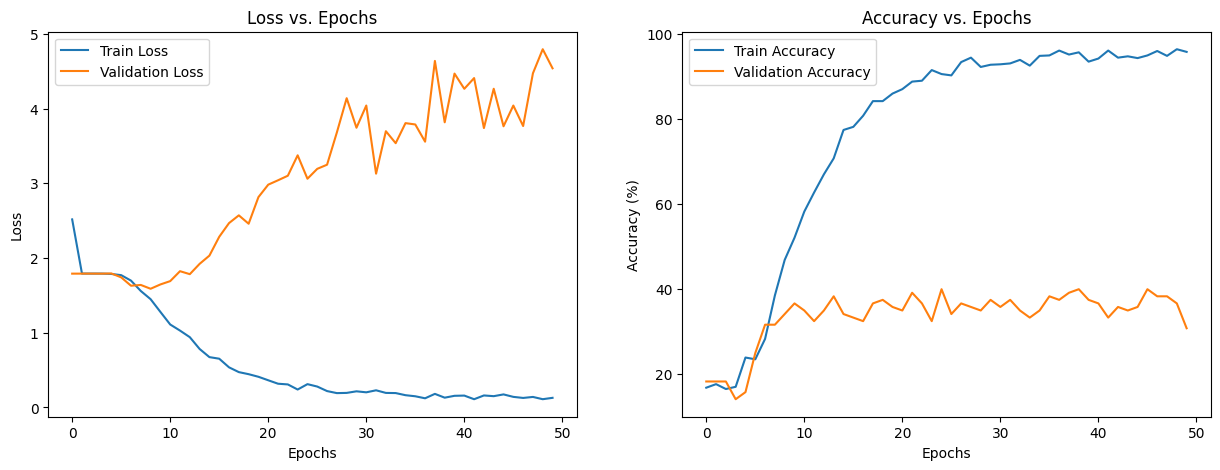


--- Generating Confusion Matrix on Test Set ---
Classification Report:
              precision    recall  f1-score   support

       anger       0.39      0.35      0.37        20
     disgust       0.62      0.60      0.61        25
        fear       0.26      0.29      0.28        17
       happy       0.20      0.12      0.15        17
        pain       0.37      0.33      0.35        21
         sad       0.20      0.30      0.24        20

    accuracy                           0.35       120
   macro avg       0.34      0.33      0.33       120
weighted avg       0.36      0.35      0.35       120



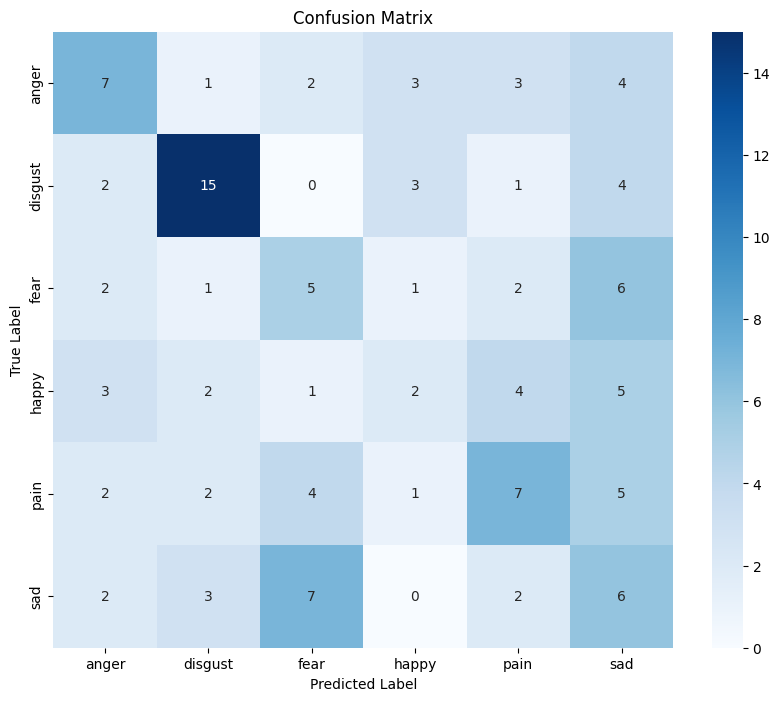

In [21]:
# --- Run Training ---
# Get the list of weights calculated previously
# calculates an inverse relationship to class frequency
class_weights = [stats['class_weight'] for stats in class_stats.values()]

# Convert weights to a PyTorch tensor
class_weights_tensor = torch.tensor(class_weights, dtype=torch.float32)

# Move weights to the same device as model (e.g., 'cuda' or 'cpu')
class_weights_tensor = class_weights_tensor.to(device)

# The weights will automatically penalize errors on minority classes more heavily
criterion = nn.CrossEntropyLoss(weight=class_weights_tensor)

model = SimpleCNN(num_classes=len(class_names)).to(device)
# criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE, weight_decay=1e-4)

# Dictionary to store metrics for plotting
history = {
    'train_loss': [], 'train_acc': [],
    'val_loss': [], 'val_acc': []
}

# --- Main Training Loop ---
for epoch in range(NUM_EPOCHS):
    train_loss, train_acc = train_one_epoch(model, criterion, optimizer, train_loader, device)
    val_loss, val_acc = evaluate(model, criterion, val_loader, device)
    
    # Store history
    history['train_loss'].append(train_loss)
    history['train_acc'].append(train_acc)
    history['val_loss'].append(val_loss)
    history['val_acc'].append(val_acc)
    
    print(f"Epoch {epoch+1}/{NUM_EPOCHS} | "
            f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}% | "
            f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%")

# --- Post-Training Analysis ---
print("\n--- Training Complete ---")

# 1. Plot training curves to check for overfitting
plot_curves(history)

# 2. Generate final confusion matrix on the test set
generate_confusion_matrix(model, test_loader, device, class_names)

In [22]:
#...
#...
#...
#...
#...
#...
#...
#...
#...
#...
#...
#...
#...
#...
#...
#...
#...
#...
#...
#...
#...
#...
#...
#...
#...
#...
#...
#...
#...

## **Task 2 (C Task) Analyse and improve the model**

### Task 2.1 Build an input pipeline for data augmentation


Implement a preprocessing pipeline that applies at least three augmentation techniques (e.g., random crop, horizontal flip, rotation, color jitter).

- Propose and implement a preprocessing pipeline that uses at least three augmentation techniques of your choice.
- Justify why you selected these augmentations, including what kind of invariances they introduce (e.g., to pose, illumination, occlusion).
- How does augmentation contribute to improving generalization in deep learning models?
- In what ways can augmentation help mitigate class imbalance?
- Discuss how augmentation might alter training dynamics (e.g., convergence speed, training time per epoch).
- Compare the performance of your model with and without augmentation. What changes do you observe in accuracy, F1-scores, and per-class performance?
- Reflect on the computational trade-offs: if augmentation effectively doubles or triples your dataset, how might this influence scalability and training cost?

### Task 2.2 Compare the performance under equal training time

- If you constrain both the baseline and augmented models to the same training budget (e.g., fixed number of epochs, gradient updates, or wall-clock time), does augmentation still improve performance?
- What does this tell you about the efficiency and cost-effectiveness of augmentation?
- Do you believe the improvements in robustness and generalization justify the additional computational expense? Why or why not?
### Task 2.3 Identifying model strengths and weaknesses

- Examine misclassified samples from your model. What patterns do you notice across these errors (e.g., lighting variations, partial occlusion, ambiguous facial expressions)?
- How might augmentation or other preprocessing methods be refined to specifically target these weaknesses?
- Could certain augmentations unintentionally harm performance (e.g., rotations making “happy” resemble “surprised”)? How would you balance the benefits and risks?
- Based on your analysis, propose at least one concrete refinement to your augmentation strategy and explain why it may be effective.

## **Task 3 (D Task) Improve model generalisability across domains**

So far, you have only trained and evaluated models using training and test images drawn from the same dataset source (via random splits). In this task, you will examine domain shift by testing your model on new data collected from a different source. For example, you might take photos of yourself or others performing facial expressions (with appropriate anonymisation), or you might draw samples from another publicly available emotion dataset.

- Collect a new set of test images from a different source and show representative samples alongside the original test set. In what fundamental ways do the new images differ (e.g., resolution, cultural expression, background, noise, occlusion), and how might these differences challenge the assumptions of your trained model?

- What preprocessing techniques you need to use for the new test data so that you can feed the data to your previously trained model.

- Feed the new test data into your model. Report the performance change using different evaluation metrics.

- Show the missclassified images of new test data and consider discussing why a certain image or class is having poor results.

- Improve your model so that it generalises better on unseen test images. Discuss what steps you use for this improvement?

- Use and discuss methods for avoiding the overfitting while training the new model. Explore and illustrate this matter using Tensorboard.

You need to include sufficient analysis to demonstrate that:

- You have obtained a deeper understanding of challenges in model generalisation, through designing experiments and analysing the results.
- You have empirically evaluated different measures to address such challenges and can apply your learning to explain why each measure may or may not work.


## **Task 4 (HD Task) Reproducing and Extending a Parallel CNN Approach for Brain Tumor MRI Classification**

In this task, you will engage deeply with a recent research paper that proposes a parallel deep convolutional neural network (PDCNN) for classifying brain tumors from MRI scans. You will attempt to reproduce its results, critically evaluate its limitations, and design a modified method aimed at improving at least one dataset’s performance.

📑 Paper: Rahman & Islam (2023), MRI brain tumor detection and classification using parallel deep convolutional neural networks (https://www.sciencedirect.com/science/article/pii/S2665917423000302)

### Task 4.1 Paper Analysis

Read the paper carefully and, in your own language, respond concisely to the following:

  1. What is the central idea behind the PDCNN model, and how does its dual-path architecture aim to improve classification accuracy?

  2. What preprocessing and data augmentation techniques are applied, and why are they important for this application?

  3. What are the main performance results achieved for the three datasets, and what conclusions do the authors draw about the model’s strengths?

  4. Identify and discuss at least two possible limitations of the method (related to their methodology and other constraints)

> It is critical that you base your answers on your own interpretation of the method and results.


### Task 4.2 Reproduction & Investigation

Using publicly available datasets in this paper and all of the information provided in the paper.

  1. Implement and discuss the PDCNN as described in the paper, including preprocessing, grayscale conversion, resizing, and anisotropic diffusion filtering. 

  2. Train and evaluate the model on two datasets used in the paper (Dataset-I: Binary Kaggle, Dataset-III: Multi-class Kaggle. We dont want the results on Dataset-II: Multi-class Figshare as it is already provided on Dataset-III and provides only matlab files). Provide a clarification of the distribution of datasets mentioning if there is any imbalanced data issue.
  
  3. Compare your obtained metrics (accuracy, precision, recall, F1-score) to the results reported in the paper. Highlight any differences and possible reasons for them (e.g., random initialization,...).

### Task 4.3 Method Improvement and Analysis

  1. Propose and implement at least one modification to the original method aimed at improving classification performance.
  
    - Discuss your proposed method

    - Mention why you think your model works better.

    - Consider avoiding overfitting and illustrating that you have avoided it while training.

  2. Evaluate your modified model on the same datasets and compare the results to both:
    - Your reproduced baseline.
    - The paper’s reported results.

  3. Discuss whether your modification improved, matched, or degraded performance. If it did not improve results, provide a detailed discussion of why your method may have disadvantages compared to the original, and what trade-offs you were aiming to capture (e.g., reducing overfitting, improving generalization, diminishing computational cost). Speculation on how this could be addressed or improved in future work.


  > (For HD task only) In addition to short answers to the above questions, submit a short (less than 5 minutes) video presentation for your analysis and main conclusions. (The video content should cover only the HD task.)

---
**END OF ASSIGNMENT THREE**